# Clustering

## Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import scipy.cluster.hierarchy

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN

%matplotlib inline

## Load Data From CSV File

In [2]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [3]:
# summarize the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data pre-processing

In [4]:
gender = {"Gender":{'Female': 1,'Male': 0}}
df.replace(gender , inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


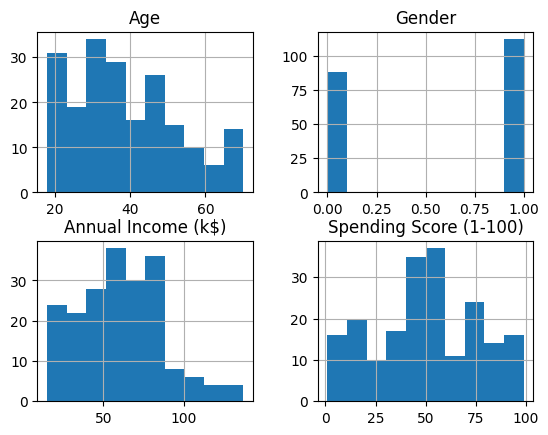

In [5]:
cdf = df[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]
viz = cdf
viz.hist()
plt.show()

Now, let's plot each of these features against the Annual Income (k$), to see how linear their relationship is:

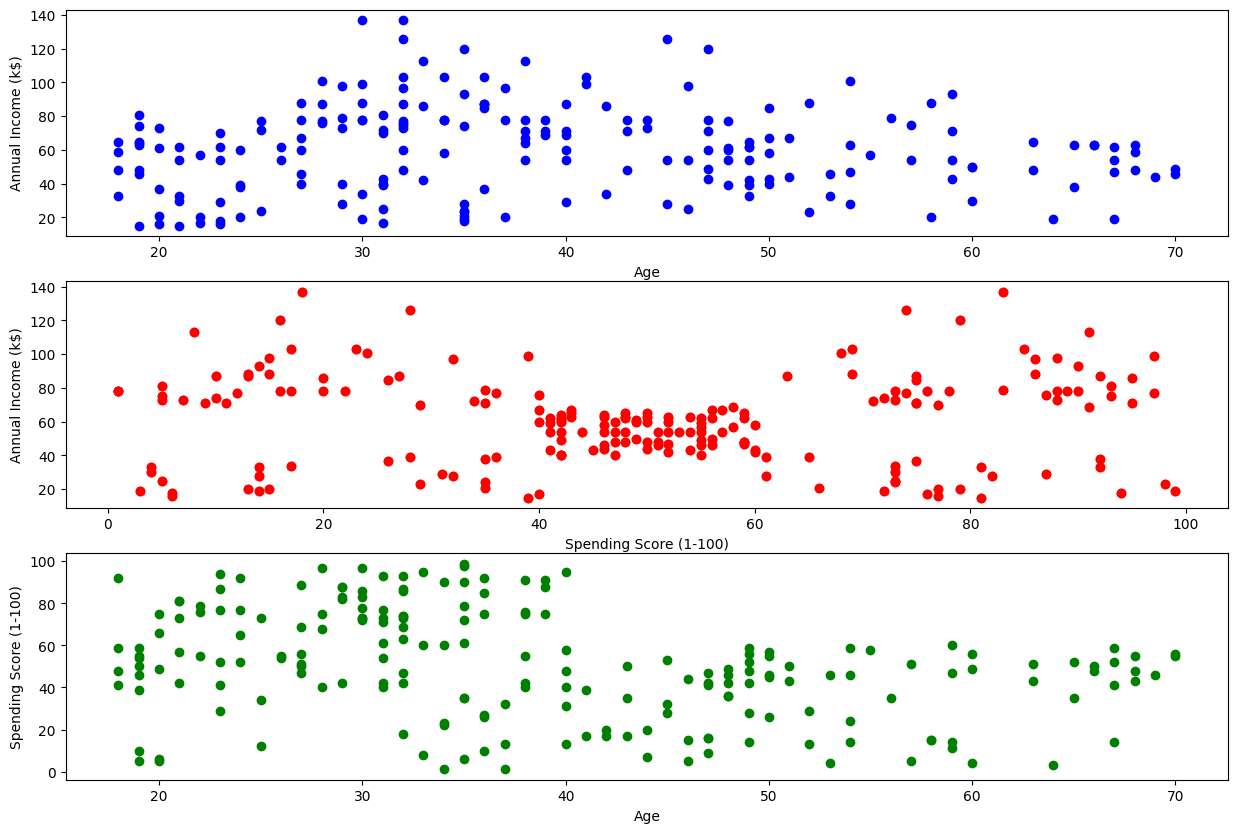

In [6]:
fig, axs = plt.subplots(3,1,figsize=(15,10), sharey='row')
ax1,ax2, ax3 = axs

ax1.scatter(cdf.Age, cdf['Annual Income (k$)'],  color='blue')
ax1.set_xlabel("Age")
ax1.set_ylabel("Annual Income (k$)")

ax2.scatter(cdf['Spending Score (1-100)'], cdf['Annual Income (k$)'],  color='red')
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")

ax2.scatter(cdf['Spending Score (1-100)'], cdf['Annual Income (k$)'],  color='red')
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")

ax3.scatter(cdf.Age, cdf['Spending Score (1-100)'],  color='green')
ax3.set_xlabel("Age")
ax3.set_ylabel("Spending Score (1-100)")

plt.show()


## Customer Segmentation with K-Means

### Normalizing over the standard deviation

In [7]:
X = df.values
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.7234121 , -1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065,  0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992,  0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 ,  0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847,  0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775,  0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702,  0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 , -1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558,  0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485, -1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413,  0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268,  0.88640526, -1.0

## Modeling

In [8]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Insights

In [9]:
df["Clus_km"] = labels
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0


In [10]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,31.5,0.596774,37.451613,30.612903,49.838710
1,166.5,0.544118,36.044118,88.911765,50.205882
2,97.5,0.542857,42.814286,59.542857,50.514286


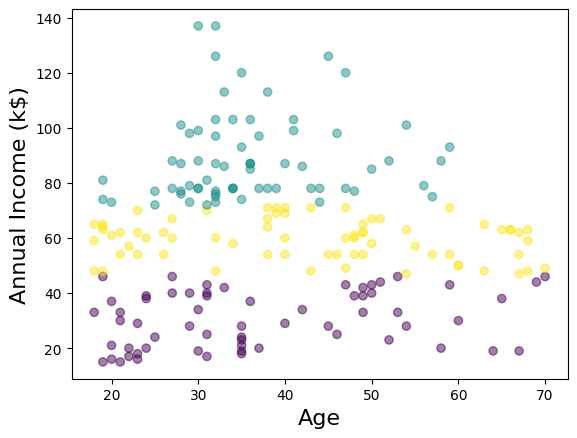

In [11]:
plt.scatter(X[:, 2], X[:, 3], c = labels, alpha = 0.5)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Annual Income (k$)', fontsize = 16)
plt.show()

# Customer Segmentation with Hierarchical

In [12]:
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx [0:5]

array([[0.        , 0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 0.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 1.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 1.        , 0.25      , 0.01639344, 0.39795918]])

In [13]:
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43032315 1.055428   ... 1.41345435 1.44858323 1.49877657]
 [0.43032315 0.         1.25942674 ... 1.35931186 1.56141421 1.42138915]
 [1.055428   1.25942674 0.         ... 1.818757   1.73838961 1.902105  ]
 ...
 [1.41345435 1.35931186 1.818757   ... 0.         0.57852001 0.13469899]
 [1.44858323 1.56141421 1.73838961 ... 0.57852001 0.         0.66439853]
 [1.49877657 1.42138915 1.902105   ... 0.13469899 0.66439853 0.        ]]


In [14]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\B_Ameri\AppData\Local\Temp\ipykernel_19476\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


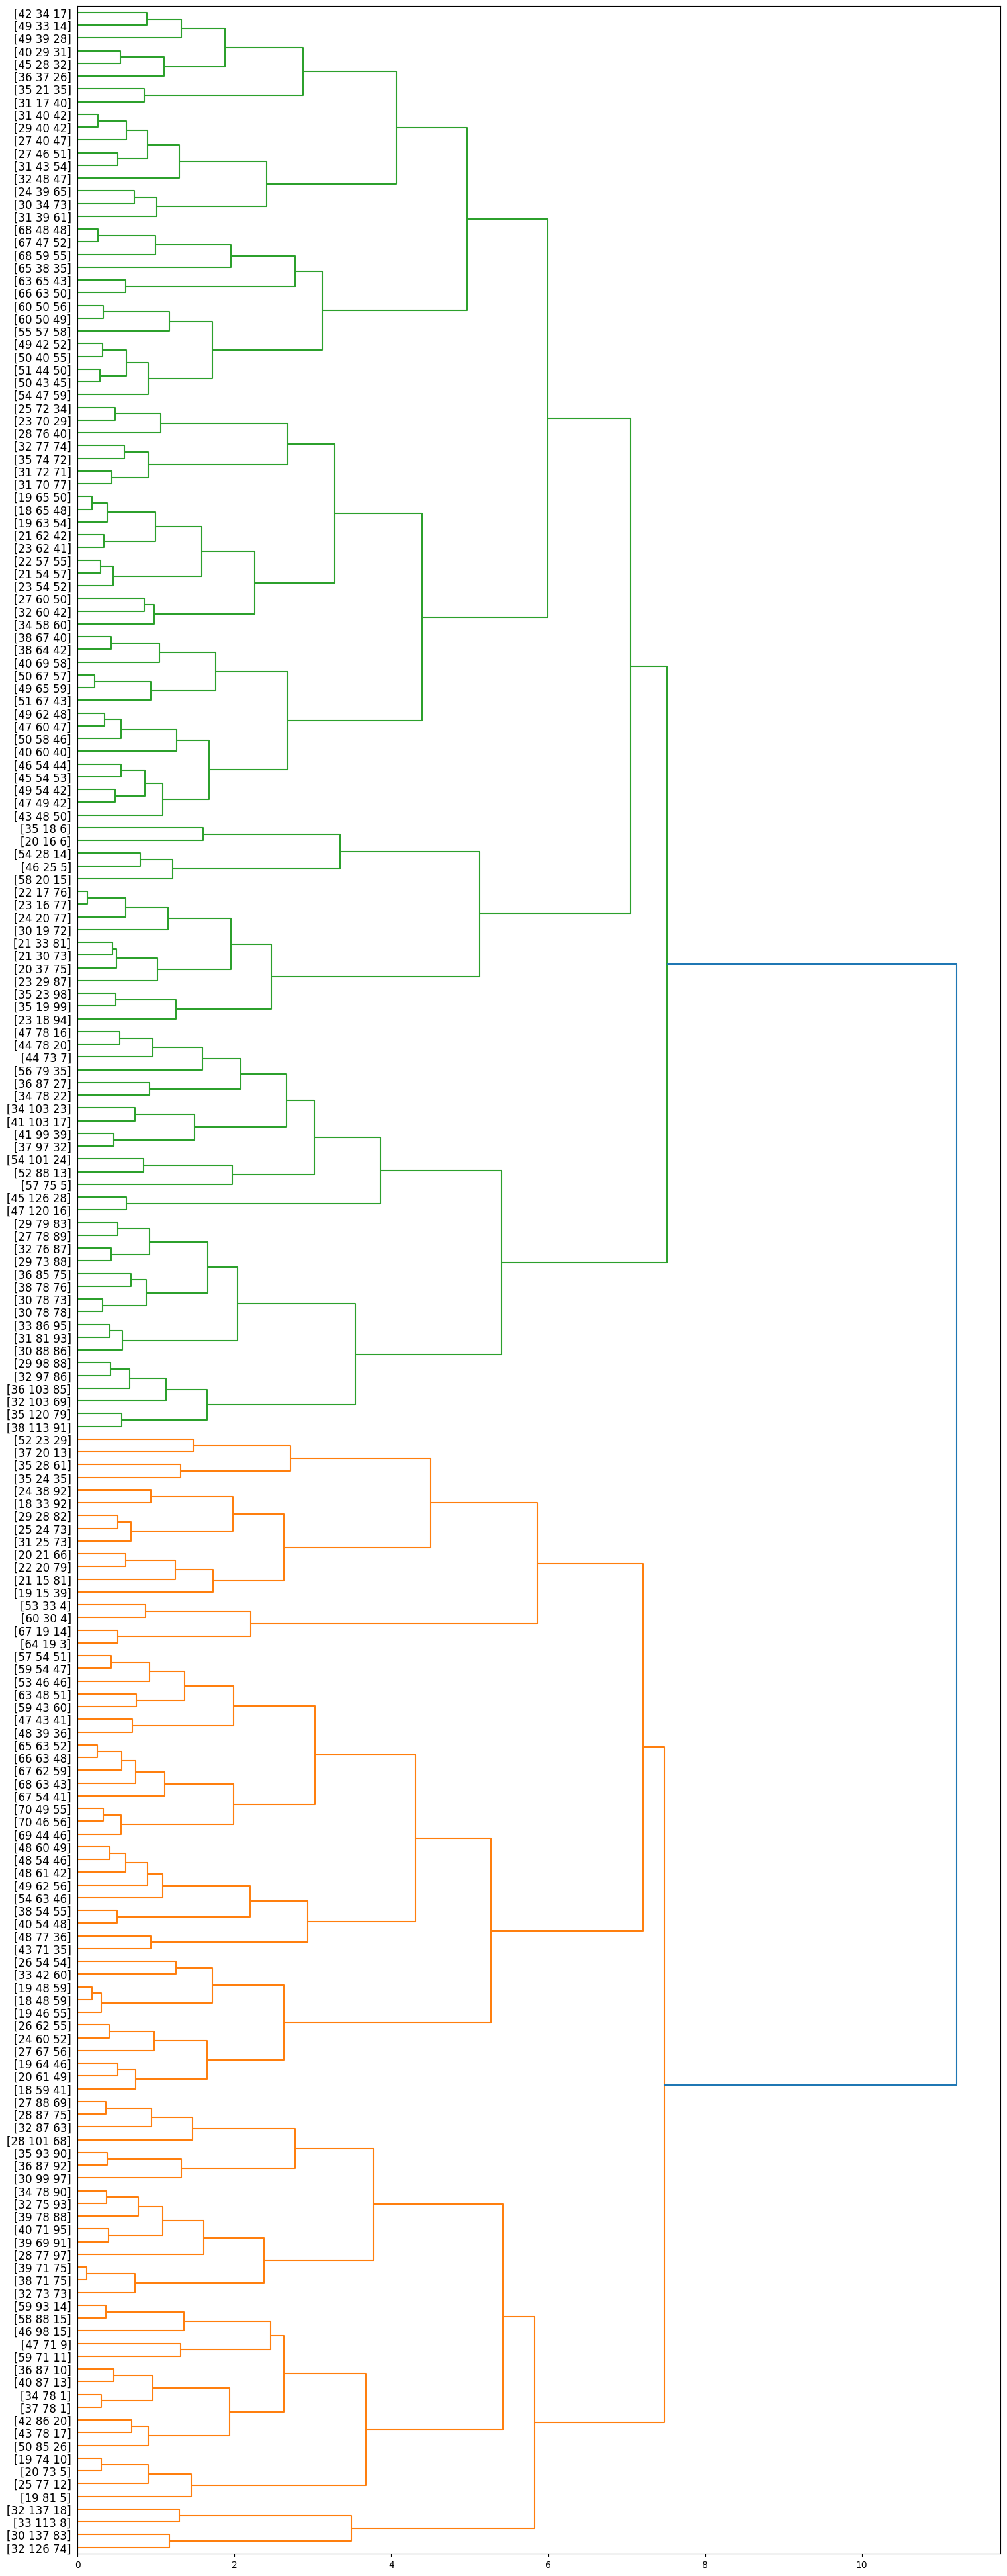

In [15]:
fig = pl.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id], df['Spending Score (1-100)'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func = llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [16]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0], dtype=int64)

In [17]:
df['cluster_agglom'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km,cluster_agglom
0,1,0,19,15,39,0,0
1,2,0,21,15,81,0,0
2,3,1,20,16,6,0,1
3,4,1,23,16,77,0,1
4,5,1,31,17,40,0,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Spending Score (1-100)')

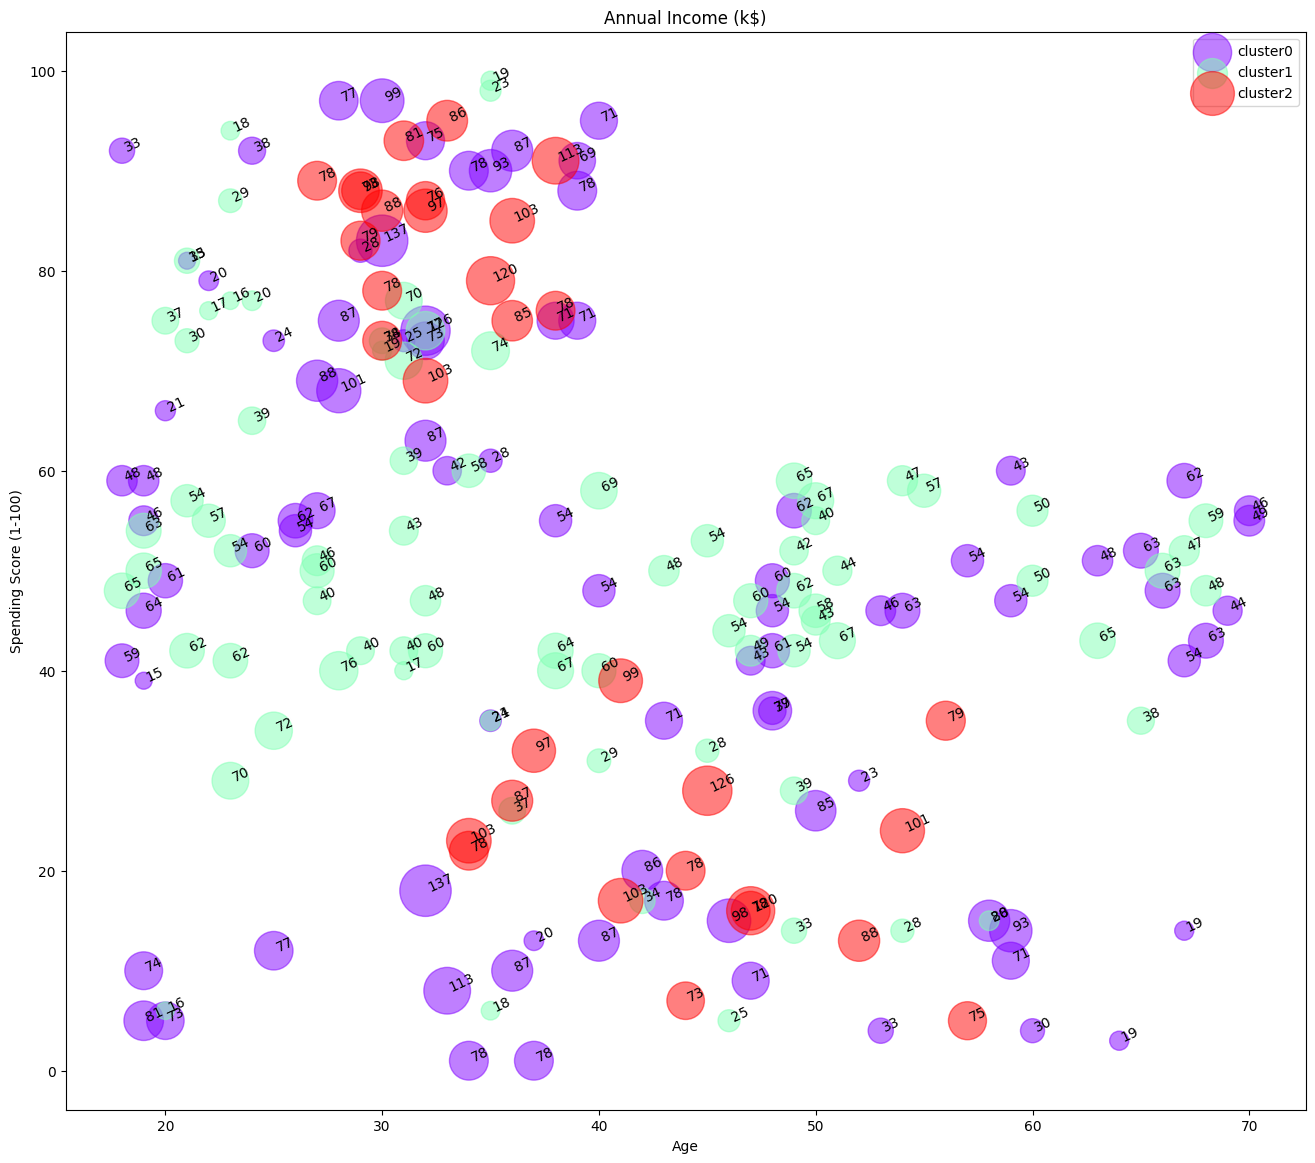

In [18]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_agglom == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset['Spending Score (1-100)'][i],subset['Annual Income (k$)'][i], rotation=25) 
    plt.scatter(subset.Age, subset['Spending Score (1-100)'], s= subset['Annual Income (k$)']*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Density-Based Clustering

In [19]:
epsilon = 0.6
minimumSamples = 7
db = DBSCAN(eps = epsilon, min_samples = minimumSamples).fit(Clus_dataSet[:,2:])
labels = db.labels_
labels

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0,  1,  0, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,
        0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,
        1,  1,  0, -1,  1,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,
        1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1, -1,  2,  0,  2,  1,  2, -1,  2,  3,  2,  0,  2, -1,  2,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2,  1,  2, -1,  2,  3,  2,  3,
        2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2, -1,  2, -1,  2, -1,  2,  3,  2, -1,  2, -1,
        2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [20]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True, False,
        True,  True, False, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False,

In [21]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

4

In [22]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3}

In [23]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

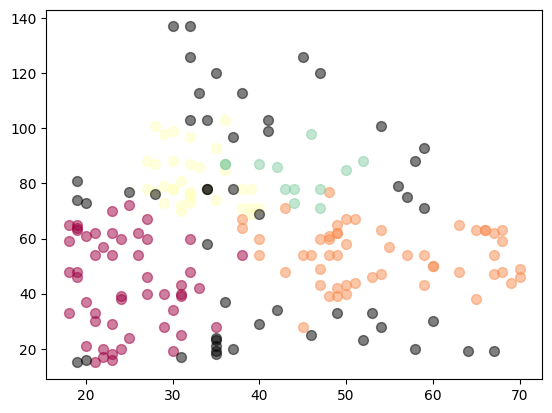

In [24]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    
    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=50, c=[col], marker=u'o', alpha=0.5)